In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from urllib.request import urlopen
import requests
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

from scipy import stats
from sklearn.ensemble import RandomForestClassifier 

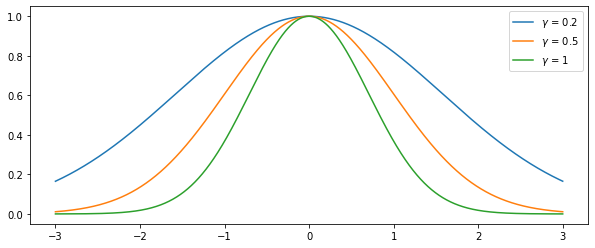

In [196]:
def gauss(x, gamma):
    return np.exp(-gamma * x ** 2)
x = np.arange(-3,3,0.001)
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(x,gauss(x,0.2),label=r'$\gamma$ = 0.2')
ax.plot(x,gauss(x,0.5),label="$\gamma$ = 0.5")
ax.plot(x,gauss(x,1),label="$\gamma$ = 1")
ax.legend()

In [197]:
link = "https://raw.githubusercontent.com/shuailab/ind_498/master/resource/data/KR.csv"
r = requests.get(link)
data = pd.read_csv(StringIO(r.text))
X = data[['x']]
Y = data[['y']]

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [199]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score

kernels = ['linear','rbf']
gammas = [0.0001,0.01,0.1,0.5,1.0,2.0,3.0]
for kernel in kernels:
    for gamma in gammas:
        clf = KernelRidge(gamma=gamma, kernel=kernel)
        clf.fit(x_train, y_train)
        mse = - cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
        print('kernel:{kernel}, gamma:{gamma}, mean squared error:{mse}.'.format(
            kernel=kernel, gamma=gamma, mse= np.mean(mse)) )

kernel:linear, gamma:0.0001, mean squared error:0.14740403835662272.
kernel:linear, gamma:0.01, mean squared error:0.14740403835662272.
kernel:linear, gamma:0.1, mean squared error:0.14740403835662272.
kernel:linear, gamma:0.5, mean squared error:0.14740403835662272.
kernel:linear, gamma:1.0, mean squared error:0.14740403835662272.
kernel:linear, gamma:2.0, mean squared error:0.14740403835662272.
kernel:linear, gamma:3.0, mean squared error:0.14740403835662272.
kernel:rbf, gamma:0.0001, mean squared error:0.119132141808076.
kernel:rbf, gamma:0.01, mean squared error:0.09630716396693781.
kernel:rbf, gamma:0.1, mean squared error:0.15638267476565137.
kernel:rbf, gamma:0.5, mean squared error:0.25200017543899356.
kernel:rbf, gamma:1.0, mean squared error:0.29735352317047975.
kernel:rbf, gamma:2.0, mean squared error:0.33356991815687115.
kernel:rbf, gamma:3.0, mean squared error:0.3515435592746584.


In [200]:
# Use the best parameter
clf = KernelRidge(gamma=0.01, kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import mean_squared_error
print('mean squared error:{mse}.'.format(
             mse= mean_squared_error(y_pred, y_test) ) )

mean squared error:0.03140177869436614.


In [201]:
### Generate data
from patsy import dmatrix
npoints = 200
x = np.sort(np.random.uniform(0, 100, size=npoints))
xdf = pd.DataFrame(x)
dmat = dmatrix("cr(x, df=6) ", {"x": x})
# dmat = dmatrix("bs(x, df=6,include_intercept=False) - 1", {"x": x})
# dmat = dmatrix("bs(x, df=4, degree=3, include_intercept=False) - 1", {"x": x})
ddf = pd.DataFrame(dmat)
ddf.columns = ['X1','X2','X3','X4','X5','X6','X7']
# ddf['X0'] = 1
ddf = ddf[['X1','X2','X3','X4','X5','X6','X7']]
b = np.array([0.82,0.417,-0.32,-0.3,-0.5,0.4,0.3])
y = np.dot(ddf, b) + np.random.normal(0, 0.2, npoints)
y_no_noise = np.dot(ddf, b)

In [202]:
def kernel_predict(gamma,x_train,y_test,x_test):    
    clf = KernelRidge(gamma=gamma, kernel='rbf')
    clf.fit(x_train,y_test)
    y_pred = clf.predict(x_test)
    return ypred

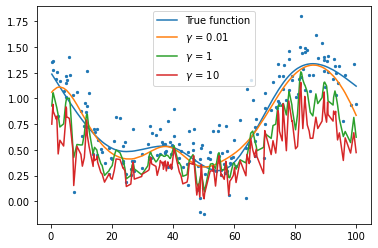

In [203]:
clf = KernelRidge(gamma=0.01, kernel='rbf')
clf.fit(xdf,y)
ypred_00_1 = clf.predict(xdf)

clf = KernelRidge(gamma=1, kernel='rbf')
clf.fit(xdf,y)
ypred_1 = clf.predict(xdf)

clf = KernelRidge(gamma=10, kernel='rbf')
clf.fit(xdf,y)
ypred_10 = clf.predict(xdf)

plt.scatter(x, y, s=5, marker='o')
plt.plot(x, y_no_noise)
plt.plot(x, ypred_00_1)
plt.plot(x, ypred_1)
plt.plot(x, ypred_10)
plt.legend(["True function","$\gamma$ = 0.01", 
           "$\gamma$ = 1", "$\gamma$ = 10"])

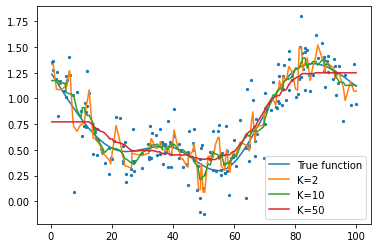

In [204]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
ypred_2 = neigh.fit(xdf,y).predict(xdf)

neigh = KNeighborsRegressor(n_neighbors=10)
ypred_10 = neigh.fit(xdf,y).predict(xdf)

neigh = KNeighborsRegressor(n_neighbors=50)
ypred_50 = neigh.fit(xdf,y).predict(xdf)

plt.scatter(x, y, s=5, marker='o')
plt.plot(x, y_no_noise)
plt.plot(x, ypred_2)
plt.plot(x, ypred_10)
plt.plot(x, ypred_50)
plt.legend(["True function","K=2", 
           "K=10", "K=50"])

### Conditional variance function

In [209]:
# generate data 

import numpy

data = pd.DataFrame()
for i in range(100):
    mu, sigma = 0, 2
    x = numpy.random.normal(mu, sigma, 1)[0]
    std = 0.5 + 0.8 * x ** 2
    eps = numpy.random.normal(mu, std, 1)[0]
    y = 1 + x * 0.5 + eps
    y_true = 1 + x * 0.5 
    this_df = pd.DataFrame({"x0": [1],
                            "x1":x,
                            "y":y,
                            "y_true":y_true
                           })
    data = data.append(this_df)


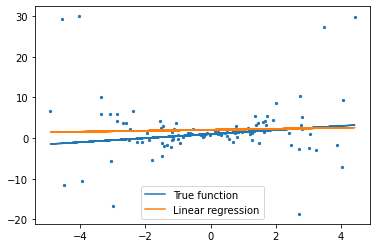

In [210]:
plt.scatter(data.x1, data.y, s=5, marker='o')
plt.plot(data.x1, data.y_true);

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data[['x1']].values, data[['y']].values)
y_pred = reg.predict(data[['x1']])
plt.plot(data.x1.values, y_pred);

#ypred = spline_predict(xdf,3)
# plt.plot(x, ypred);
# ypred = spline_predict(xdf,6)
# plt.plot(x, ypred);
# ypred = spline_predict(xdf,15)
# plt.plot(x, ypred);
# plt.ylim([-0.3, 1.6])
plt.legend(["True function","Linear regression"])

residual = y_pred.flatten() - data.y
residual_squared = residual ** 2

In [211]:
kernel_clf = KernelRidge(kernel='rbf')
kernel_clf.fit(data[['x1']],residual_squared)
grid_x = np.linspace(np.min(data.x1), np.max(data.x1), 300)
grid_x = pd.DataFrame(data=grid_x, columns=["x1"])
kernel_pred = kernel_clf.predict(grid_x)

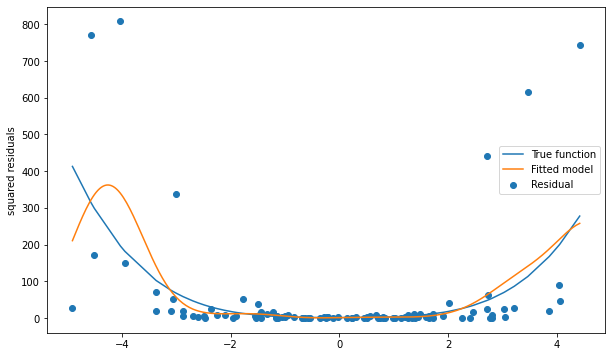

In [212]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(data.x1.values, residual_squared, marker='o',label="Residual")
sorted_x = np.sort(data.x1)
var_curve = (1 + 0.8 * sorted_x ** 2) ** 2
ax.plot(sorted_x, var_curve,label="True function")
ax.plot(grid_x, kernel_pred,label="Fitted model")
ax.set_ylabel("squared residuals")
ax.legend()
plt.show()

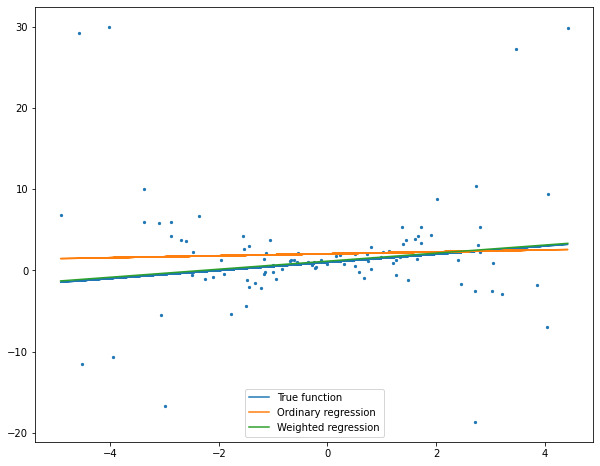

In [213]:

weights = kernel_clf.predict(data[['x1']])
weights = np.clip(weights, a_min = 0.1, a_max= 1000) 
weights = 1.0 / weights


fig, ax = plt.subplots(figsize = (10,8))
# ax.scatter(np.arange(1,101), weights, marker='o',label="Residual")

ax.scatter(data.x1, data.y, s=5, marker='o')
ax.plot(data.x1, data.y_true, label="True function");

reg = LinearRegression()


reg.fit(data[['x1']].values, data[['y']].values)
y_pred = reg.predict(data[['x1']])
plt.plot(data.x1.values, y_pred, label="Ordinary regression");

reg.fit(data[['x1']],data[['y']],sample_weight = weights)
sorted_df = pd.DataFrame(data=sorted_x, columns=["x1"])
y_pred = reg.predict(sorted_df)
ax.plot(sorted_x, y_pred, label="Weighted regression")
ax.legend()

In [214]:
### AD data set
link = "https://raw.githubusercontent.com/shuailab/ind_498/master/resource/data/AD.csv"
r = requests.get(link)
data = pd.read_csv(StringIO(r.text))
X = data[['HippoNV']]
Y = data['MMSCORE']

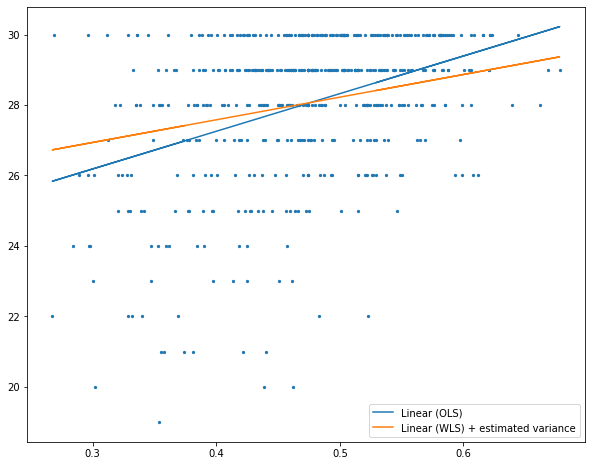

In [220]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,Y)
y_pred = reg.predict(X)

residual = y_pred.flatten() - Y
residual_squared = residual ** 2

kernel_reg = KernelRidge(kernel='rbf')
kernel_reg.fit(X,residual_squared)
var_pred = kernel_reg.predict(X)
var_pred = np.clip(var_pred, a_min = 0.1, a_max= 1000) 
weights = 1.0 / var_pred

reg.fit(X,Y,sample_weight = weights)
y_pred_weighted = reg.predict(X)


fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(X, Y, s=5, marker='o')
ax.plot(X, y_pred, label="Linear (OLS)")
ax.plot(X, y_pred_weighted, label="Linear (WLS) + estimated variance")
ax.legend()

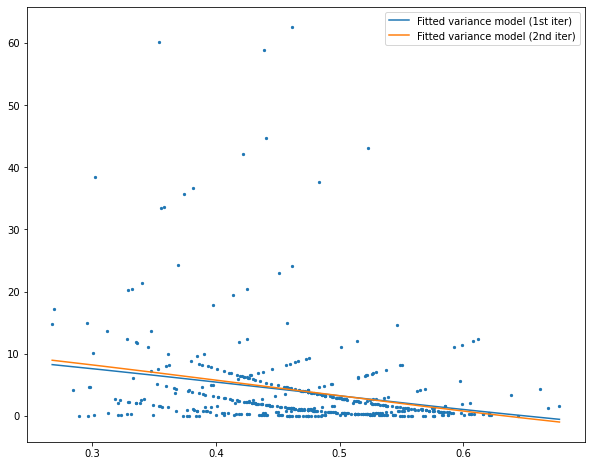

In [229]:

residual_squared2 = (y_pred_weighted.flatten() - Y) ** 2
kernel_reg2 = KernelRidge(kernel='rbf')
kernel_reg2.fit(X,residual_squared2)


grid_x = np.linspace(np.min(X), np.max(X), 300)
grid_x = pd.DataFrame(data=grid_x, columns=["x1"])
var_pred1 = kernel_reg.predict(grid_x)
var_pred2 = kernel_reg2.predict(grid_x)

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(X, residual_squared, s=5, marker='o')
ax.plot(grid_x, var_pred1, label="Fitted variance model (1st iter)")
ax.plot(grid_x, var_pred2, label="Fitted variance model (2nd iter)")
ax.legend()